In [1]:
import math
import pandas as pd
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange, IndexDateFormatter

In [2]:
mgstatfile = '../part1/mgstat.txt'
data = pd.read_csv(
    mgstatfile, 
    header=1,
    parse_dates=[[0,1]]
   )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25635 entries, 0 to 25634
Data columns (total 37 columns):
Date_       Time        25635 non-null datetime64[ns]
  Glorefs               25635 non-null int64
 RemGrefs               25635 non-null int64
 GRratio                25635 non-null int64
  PhyRds                25635 non-null int64
 Rdratio                25635 non-null float64
 Gloupds                25635 non-null int64
 RemGupds               25635 non-null int64
 Rourefs                25635 non-null int64
 RemRrefs               25635 non-null int64
  RouLaS                25635 non-null int64
 RemRLaS                25635 non-null int64
  PhyWrs                25635 non-null int64
   WDQsz                25635 non-null int64
  WDtmpq                25635 non-null int64
 WDphase                25635 non-null int64
  WIJwri                25635 non-null int64
  RouCMs                25635 non-null int64
 Jrnwrts                25635 non-null int64
   GblSz                2

In [3]:
data.columns=data.columns.str.strip()
data=data.rename(columns={'Date_       Time':'DateTime'})

In [4]:
data.index=data.DateTime

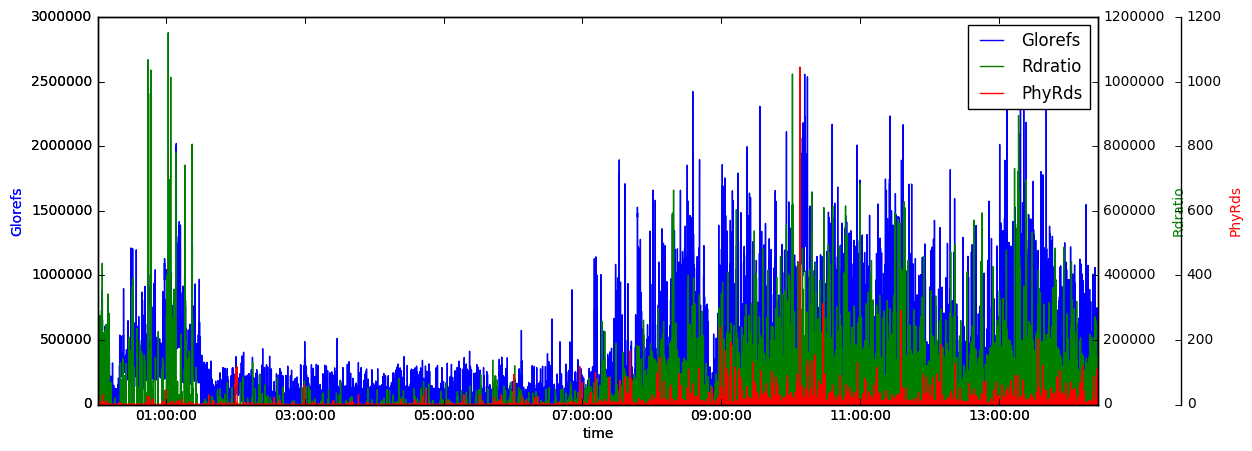

In [5]:
plt.gcf()
plt.figure(num=None, figsize=(16,5), dpi=80, facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",axes=par2,offset=(offset, 0))
par2.axis["right"].toggle(all=True)

host.set_xlabel("time")
host.set_ylabel("Glorefs")

par1.set_ylabel("Rdratio")
par2.set_ylabel("PhyRds")
ws=30
p1,=host.plot(data.Glorefs,label="Glorefs")
p2,=par1.plot(data.Rdratio,label="Rdratio")
p3,=par2.plot(data.PhyRds,label="PhyRds")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()